# Exploratory Data Analysis(EDA)

주어진 Boston House Prices 데이터 예측 모델링을 진행 하기에 앞서, 각 변수 별 특징을 탐색해보는 과정을 진행한다. 

In [2]:
# 필요한 library 들을 import
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd
import scipy as sp
from sklearn import datasets

In [32]:
# 데이터 로드 및 확인
data = datasets.load_boston()
data_target = data.target.reshape(-1,1)
data_features = data.data

data_full = np.hstack((data_features, data_target))

feature_name = np.append(data.feature_names, np.array(['MEDV']))
dataset = pd.DataFrame(data=data_full, columns=feature_name)
print(dataset.head)

<bound method NDFrame.head of          CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
0     0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900   1.0  296.0   
1     0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671   2.0  242.0   
2     0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671   2.0  242.0   
3     0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622   3.0  222.0   
4     0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622   3.0  222.0   
5     0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622   3.0  222.0   
6     0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605   5.0  311.0   
7     0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505   5.0  311.0   
8     0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821   5.0  311.0   
9     0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921   5.0  311.0   
10    0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467   5.0  311.0   
11    0.11747  12.5   7.87   0.0  

### 1. 기초 통계 확인 및 데이터 분포 확인

데이터의 각 변수들의 기본적인 통계랑과 분포를 히스토그램을 통해 확인한다.

In [33]:
# 데이터 기초 통계량 확인
pd.set_option('precision', 2)
dataset.describe()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.59e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.65e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


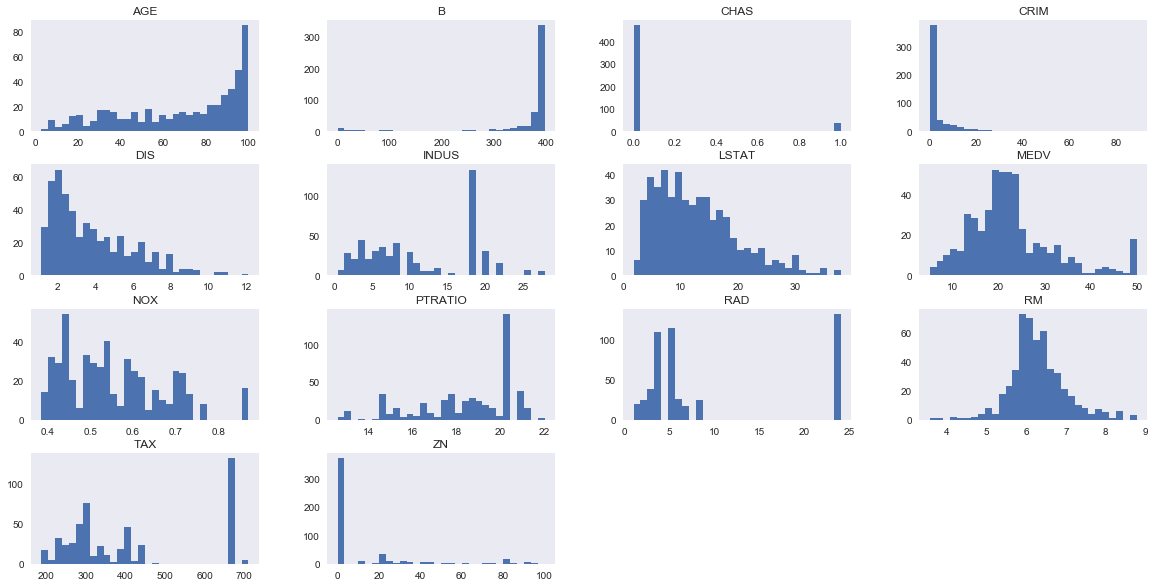

In [34]:
# 각 변수들의 분포 확인 (양분되는 데이터들도 확인 rad같은 경우.. 쪼개서.. 다른점이 있는지 확인하려고)
# 이걸보고 데이터를 어떻게해야겠다 check
dataset.hist(bins=30,figsize=(20,10), grid=False);

히스토그램을 살펴보면 대체적으로 skewed 되어있음을 확인할 수 있다. 이를 추후에는 skewness를 완화해서 모델링에 활용하는 편이 좋을 것으로 예상된다. 또한 이산형 변수인 CHAS이외에도 ZN, RAD 등은 데이터의 분포가 양분화 시킬 수 있음을 확인 할 수 있다.

### 2. 상관관계 분석

직관적으로 집 가격에 가장 영향을 미칠만한 요소는 CRIM, RM, LSTAT, PTRATIO와 그 다음으로 TAX, DIS, RAD 라 생각하며, 이를 상관관계를 통해 확인한다.

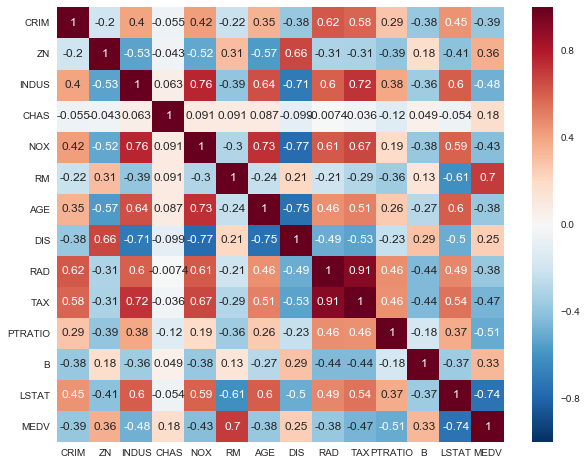

In [35]:
# 데이터 변수 간의 상관관계 확인 (상관관계 = 경향성)
# 내가 처음 관련성이 높다고 예측한 변수가 진짜 높은지 확인
# 중요하지않네 라고 넘어가는 것이 아니라 한번더 확인해야한다.
ax, fig = plt.subplots(figsize=(10,8))
sns.heatmap(dataset.corr(), annot=True)
plt.show()

위의 상관관계 결과를 살펴보면, RM과 LSTAT 의 경우 절대값 기준 0.7 이상의 높은 상관성을 보임을 확인 할 수 있다.
PTRATIO의 경우도 그 보다는 낮지만 절대값 기준 0.5 이상의 상관성을 보인다.
예상과 달리, CRIM 의 경우는 -0.39로 낮은 상관성을 가지며, 이에 대해 살펴볼 필요가 있다.

(array([374.,  40.,  26.,  21.,  15.,   7.,   7.,   3.,   4.,   1.,   0.,
          0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          1.,   0.,   1.,   0.,   0.,   0.,   0.,   1.]),
 array([6.32000000e-03, 2.97198267e+00, 5.93764533e+00, 8.90330800e+00,
        1.18689707e+01, 1.48346333e+01, 1.78002960e+01, 2.07659587e+01,
        2.37316213e+01, 2.66972840e+01, 2.96629467e+01, 3.26286093e+01,
        3.55942720e+01, 3.85599347e+01, 4.15255973e+01, 4.44912600e+01,
        4.74569227e+01, 5.04225853e+01, 5.33882480e+01, 5.63539107e+01,
        5.93195733e+01, 6.22852360e+01, 6.52508987e+01, 6.82165613e+01,
        7.11822240e+01, 7.41478867e+01, 7.71135493e+01, 8.00792120e+01,
        8.30448747e+01, 8.60105373e+01, 8.89762000e+01]),
 <a list of 30 Patch objects>)

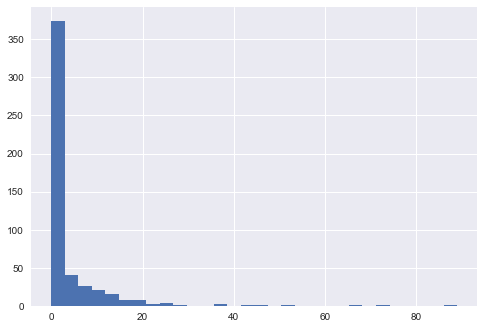

In [36]:
# CRIM과 MEDV 변수와의 관계를 파악한다
# CRIM 변수의 히스토그램
plt.hist(dataset['CRIM'], bins=30)

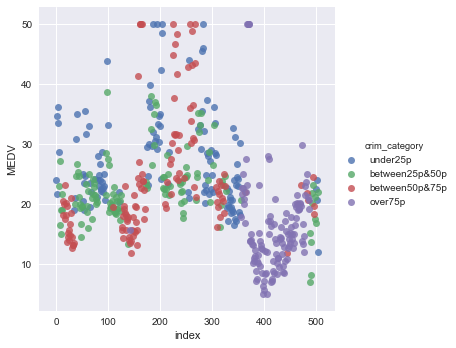

In [37]:
# CRIM 변수를 각 percentile로 categorize 하여 MEDV와의 관계를 살펴본다
# 데이터 자체를 쪼개봄. 왜냐면 저 한쪽으로 몰린 데이터들때문에 상관성이 잘 안나왔을 수도 있으니까
dataset['index'] = dataset.index
dataset['crim_category'] = np.where(dataset['CRIM'] < np.percentile(dataset['CRIM'],25), 'under25p', 
                                 np.where(dataset['CRIM'] < np.percentile(dataset['CRIM'],50), 'between25p&50p', 
                                         np.where(dataset['CRIM'] < np.percentile(dataset['CRIM'],75), 'between50p&75p', 'over75p')))
sns.lmplot('index','MEDV',data=dataset, hue='crim_category', fit_reg=False)
dataset = dataset.drop(['crim_category'], axis=1)
# 집값이 낮은부분은 거의 보라색. 즉,범죄율이 높은 곳에 늦은 집값을 예측하는데 어느정도 정보를 가지고 있다.
# 모델링을 할때 어떤 데이터를 볼 것인가에 대한 근거를 찾는 과정이다. 이게 중요함! 

히스토그램에서 대부분의 데이터가 0 주변에 분포하고 있으며, 80 이상의 상당히 높은 값도 분포하고 있는 것을 확인할 수 있다. CRIM 데이터의 percentile 별로 총 4개의 그룹으로 나누어 MEDV와의 관계를 살펴본 결과, 75percentile(3.68) 이상은 대부분 30이하의 MEDV의 값을 가짐을 알 수 있다. 상관관계에서는 나타나지 않았지만, 그룹화를 진행하여 살펴보면 CRIM 이 높은 데이터가 집값이 낮게 분포함을 알 수 있다.

### 3. 각 변수 별 관계성 파악 (Scatter Matrix)

위의 상관관계 결과에서 변수들 간의 상관성이 높은 변수를 추출하여 scatter plot을 통해 데이터 분포를 확인해본다.
상관계수의 절대값이 0.7이상인 변수들을 추출한다.
INDUS는 NOX, DIS, TAX와 상관성이 높으며, NOX와 AGE, DIS 그리고 RAD와 TAX 가 상관성이 높다. 이들 변수를 scatter matrix 를 통해 다시 확인한다.

D:\dev\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


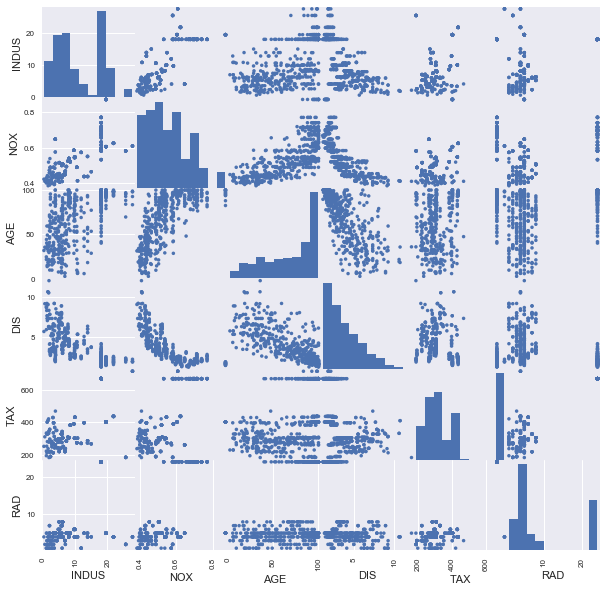

In [38]:
# 특정 변수들로 scatter matrix 생성
# regression한 r스퀘어 값을 가지고 상관관계 분석?
# RAD는 양분화되어있음
# 직접 뿌려봐야 알수 있음 수치만 보지말고
pd.scatter_matrix(dataset.loc[:,['INDUS','NOX','AGE','DIS','TAX', 'RAD']], alpha=1.0, figsize=(10, 10))
plt.show()

TAX와 RAD의 경우 0.91이라는 매우 높은 상관성을 보이는데, 이는 TAX와 RAD가 동시에 높은 값을 가지는 포인트가 모여있기 때문에 높은 상관성을 가짐을 알 수 있으며, 특이하게 TAX와 RAD의 경우 중간의 특정 영역을 기준으로 좌우로 분포가 나뉨을 볼 수 있다. 이러한 데이터 분포에 따라 MEDV가 차이가 발생하는지 추후에 확인한다.

### 4. 종속변수(MEDV)와 상관성 높은 변수 (Scatter Matrix)

종속변수와 상관성이 상대적으로 높은 변수는 LSTAT, RM, PTRATIO 이며, 이 변수들의 관계를 scatter plot으로 살펴본다.

D:\dev\anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  


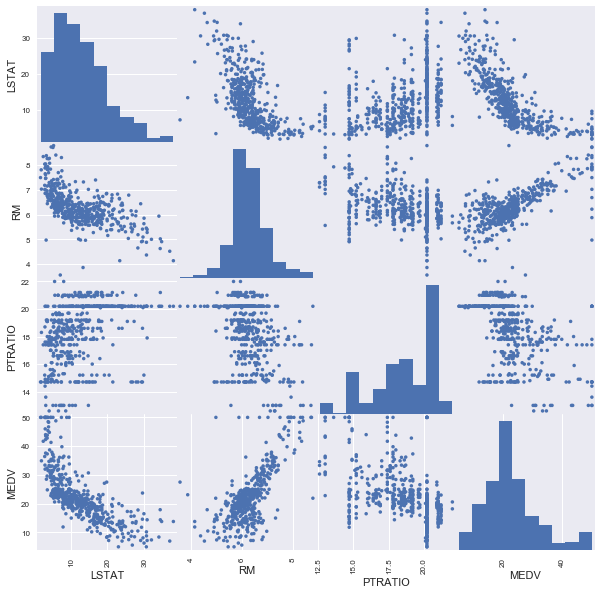

In [39]:
# 종속변수인 MEDV와 상관성이 높은 변수들로 scatter matrix 생성
pd.scatter_matrix(dataset.loc[:,['LSTAT','RM','PTRATIO','MEDV']], alpha=1.0, figsize=(10, 10))
plt.show()

### 5. 특정 변수로 그룹화하여 종속 변수와의 관련성 확인

기존의 데이터에서 이산형의 역할을 하는 CHAS와, 히스토그램상 데이터 분포가 극명하게 갈리는 ZN, RAD, TAX 변수들로 그룹화하여 종속 변수와의 관계를 확인한다.   
양분해서 볼 수 있는 데이터를 확인

우선 데이터에서 이산형 변수인 CHAS를 기준으로 그룹화하여 변수들을 확인한다. 

In [1]:
# CHAS 변수로 그룹화하여 MEDV 값의 분포와 MEDV와 관련성 높은 변수들의 분포 확인
sns.lmplot('index','MEDV',data=dataset, hue='CHAS', fit_reg=False)
sns.pairplot(dataset, vars=['LSTAT','RM','PTRATIO','MEDV'], hue='CHAS')
# 이거는 상관별로 없다고 판단되서 지웠음

NameError: name 'sns' is not defined

CHAS 의 이산형 값에 대해 중요한 변수들이 값의 차이를 보이는 모습은 보이지 않는다.

ZN 변수의 경우, 0의 값을 가지는 데이터가 전체의 50% 이상을 차지하고 있으며, 이를 기준으로 그룹을 나눠 살펴본다. 

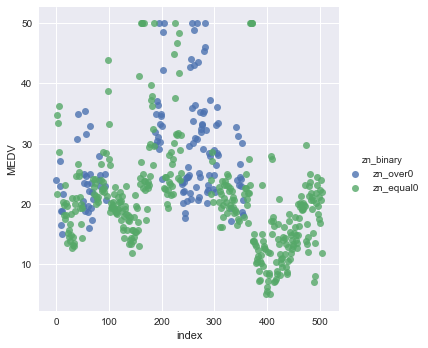

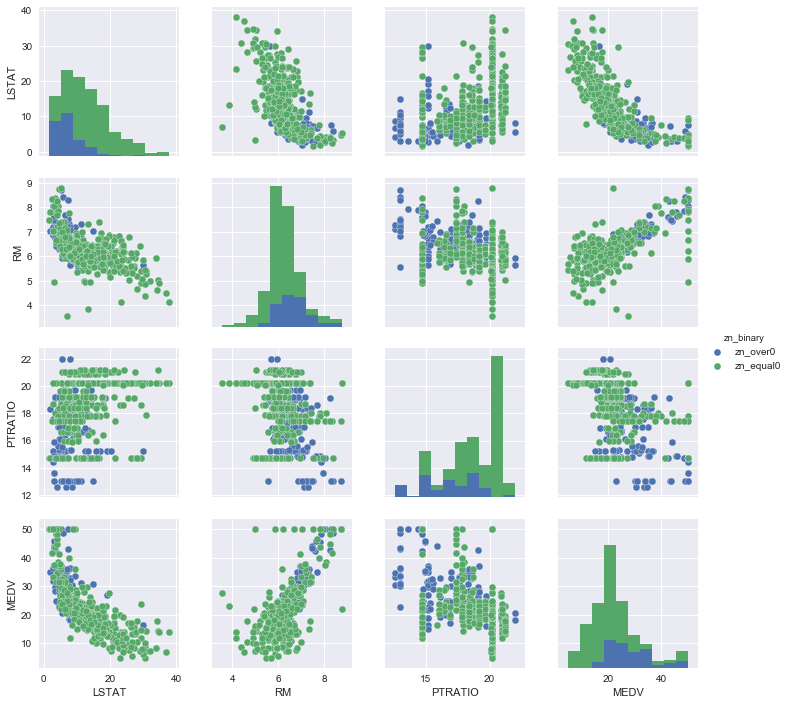

In [41]:
# ZN 변수로 0을 기준으로 데이터를 그룹화하여 MEDV 값의 분포와 MEDV와 관련성 높은 변수들의 분포 확인
dataset['zn_binary'] = np.where(dataset['ZN'] <= 0, 'zn_equal0', 'zn_over0')
sns.lmplot('index','MEDV',data=dataset, hue='zn_binary', fit_reg=False)
sns.pairplot(dataset, vars=['LSTAT','RM','PTRATIO','MEDV'], hue='zn_binary')
dataset = dataset.drop(['zn_binary'], axis=1)
# 얘도 별로 관련없다고 판단됨. 큰 의미없어서 날림

CHAS와 마찬가지로 ZN도 값의 분포에 따라 변수들의 뚜렷한 차이점이 보이지 않는다.

RAD 변수의 경우, max값인 24와 그 아래의 값으로 극명하게 나뉘므로, 이를 기준으로 그룹화하여 변수를 확인한다.

In [2]:
# RAD 변수로 24를 기준으로 데이터를 그룹화하여 MEDV 값의 분포와 MEDV와 관련성 높은 변수들의 분포 확인
dataset['rad_binary'] = np.where(dataset['RAD'] < 24, 'rad_under24', 'rad_over24')
sns.lmplot('index','MEDV',data=dataset, hue='rad_binary', fit_reg=False)
sns.pairplot(dataset, vars=['LSTAT','RM','PTRATIO','MEDV'], hue='rad_binary')
dataset = dataset.drop(['rad_binary'], axis=1)
# RAD는 상관성이 별로 없지만 오른쪽 아래부분을 설명할 수 있을 것같아 선택

NameError: name 'np' is not defined

RAD가 24인 데이터가 대체적으로 MEDV가 낮은 값을 보이며, 위에서 살펴본 CRIM over 75 percentile과 MEDV scatter plot에서 비슷한 분포를 보이는 것을 확인 할 수 있다.

TAX 변수의 경우, 600 전후로 극명하게 나뉘므로, 이를 기준으로 그룹화하여 변수를 확인한다.

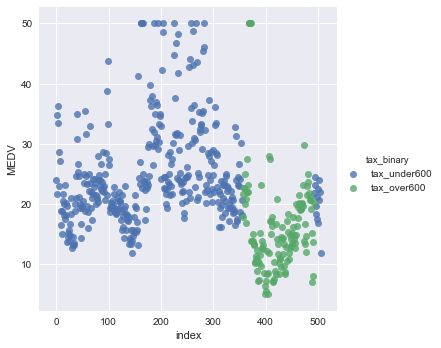

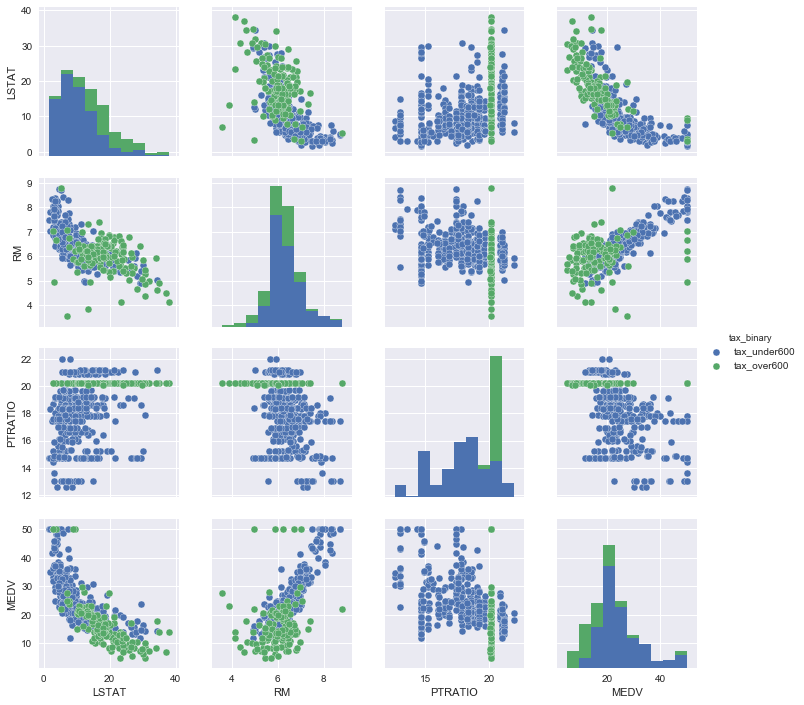

In [43]:
# TAX 변수로 600을 기준으로 데이터를 그룹화하여 MEDV 값의 분포와 MEDV와 관련성 높은 변수들의 분포 확인
dataset['tax_binary'] = np.where(dataset['TAX'] <= 600, 'tax_under600', 'tax_over600')
sns.lmplot('index','MEDV',data=dataset, hue='tax_binary', fit_reg=False)
sns.pairplot(dataset, vars=['LSTAT','RM','PTRATIO','MEDV'], hue='tax_binary')
dataset = dataset.drop(['tax_binary'], axis=1)
# 이것도 오른쪽 아래부분을 설명할 수 있을 것같아 선택

RAD와 마찬가지로 위에서 살펴본 CRIM over 75 percentile과 MEDV scatter plot에서 비슷한 분포를 보이는 것을 확인 할 수 있다.

위에서 그룹화 결과를 살펴본 것처럼, CRIM, RAD, TAX에서 비슷한 현상을 보여주고 있으므로 이를 한번 더 체크해본다.

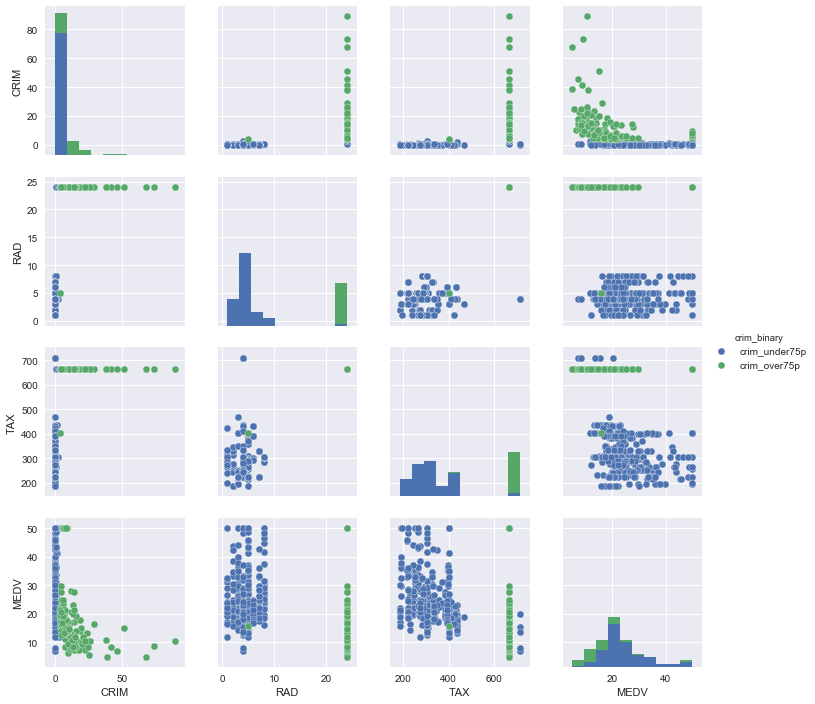

In [44]:
# RAD, TAX와 CRIM 관계 확인
dataset['crim_binary'] = np.where(dataset['CRIM'] <= np.percentile(dataset['CRIM'], 75), 'crim_under75p', 'crim_over75p')
sns.pairplot(dataset, vars=['CRIM','RAD', 'TAX', 'MEDV'], hue='crim_binary')
dataset = dataset.drop(['crim_binary'], axis=1)

TAX, RAD 의 분포때문에 명확하게 상관성은 보이지 않는다. 하지만 CRIM 75percentile 기준으로 종속변수의 차이가 나타나므로, 이는 추후 모델링에서 활용될 수 있다.

### 6. 변수 별 skewness 확인

각 변수들의 skewness를 확인하고 이를 이용하여 Transform 이 필요한 변수를 선택한다. 일반적으로 skewness가 -1보다 작거나 1보다 크면 highly skewed 라고 판단하므로, 이를 확인한다.  
기울어져있는 정도??  
scipy에 있는 함수 skew 사용 

In [46]:
skew_features = dataset.apply(lambda x: sp.stats.skew(x)).sort_values(ascending=False) # 모든변수들에 대한 skew구함
print(skew_features)
# 1보다 크면 큰것... 높은것은 처리해줘야하겠지?

CRIM       5.22
CHAS       3.40
ZN         2.22
MEDV       1.10
DIS        1.01
RAD        1.00
LSTAT      0.90
NOX        0.73
TAX        0.67
RM         0.40
INDUS      0.29
index      0.00
AGE       -0.60
PTRATIO   -0.80
B         -2.88
dtype: float64


# 예측 모델링

앞서 진행한 EDA 를 바탕으로 모델링에 활용될 변수를 선택하고, 선택된 변수를 이용하여 다양한 예측모델을 통해 최종적인 성능을 비교한다.

In [ ]:
from scipy.special import boxcox1p
from scipy.stats import boxcox, boxcox_normmax, randint, uniform
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import mean_squared_error, make_scorer

## 1. 모델링 변수 선정 및 전처리 과정(preprocessing)

이 데이터는 결측치가 있긴하지만 데이터가 작기때문에 날리지않음.

### EDA를 통한 변수 선택

앞서 진행한 EDA 의 과정을 통해서 종속변수인 MEDV 를 예측하는데 주요한 변수들을 선택한다.
 
 - MEDV와의 상관관계 분석 결과 연관성 높은 변수 : RM, LSTAT, PTRATIO 선택
 - CRIM의 경우 이 자체는 MEDV와 큰 관련성이 없는 것 같지만 EDA 결과 75 percentile 이상인 데이터에 대해 MEDV 의 경향성이 보이므로 모델에 긍정적 기여가 예상되므로 선택
 - CHAS의 경우 0/1 binary 값에 대해 MEDV의 차이가 눈에 띄지 않으므로 제외
 - ZN의 경우, 그룹화 분석 결과 MEDV와 관련성이 낮으므로 제외
 - TAX와 RAD 의 경우 상관성이 매우 높으므로 이 중 TAX만 선택
 - 나머지 변수 들인 INDUS, NOX, AGE, DIS의 경우 각 변수간의 상관성이 어느정도 있지만, 매우 높은편은 아니며, 각 데이터의 산포가 RAD, ZN 보다 크므로 예측 모델링 설명력에 기여할 수 있을것이라 판단하여 선택
 - B의 경우 MEDV와의 상관성이 제일 낮으며, 다른 변수들과의 관련성도 낮으므로 제외

최종적으로 RM,LSTAT, PTRATIO, CRIM, TAX, INDUS, NOX, AGE, DIS 를 예측모델링에 사용될 변수로 선택한다.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED08CA5A58>,
      dtype=object)

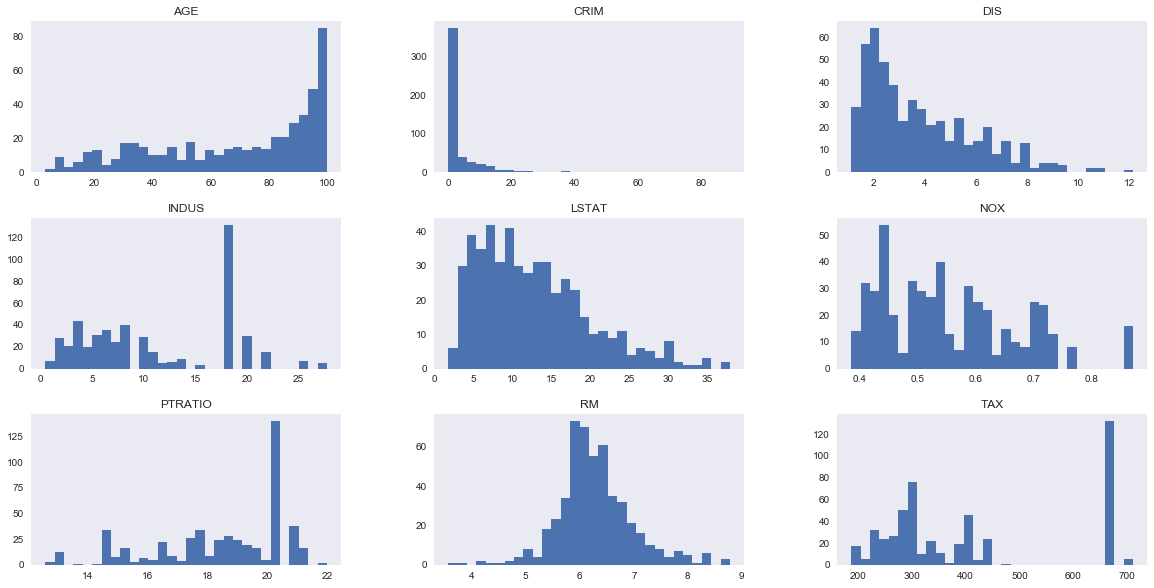

In [54]:
# 데이터 로드 및 변수 선택, 파생변수 생성
feature = dataset.drop(['MEDV', 'ZN', 'CHAS', 'RAD', 'B', 'index'],  axis=1)  # 컬럼을 날림

target = dataset['MEDV']

feature.hist(bins=30,figsize=(20,10), grid=False)

### Transform을 통해 Skewness 완화

Transform을 통해 skewness를 완화한 데이터의 분포를 재확인한다.
scipy 에서 지원하는 box-cox transformation을 이용하여 skewness를 완화하는 작업을 진행한다.
각 변수들의 skewness를 확인하고 여기서 절대값이 1보다 큰 변수를 추출한다. 해당 변수들을 boxcox transform 을 진행하며, 이때 파라미터로 사용되는 lambda는 optimal 한 box-cox 파라미터를 계산하는 boxcox_normmax 함수를 이용하여 선택한다.     
(log, boxcox 를 사용가능 한데, 여기서 boxcox사용. 로그변환을 통해 정규분포로 만들어주겠다는 것.)

CRIM    5.22
DIS     1.01
dtype: float64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001ED088FB7F0>,
      dtype=object)

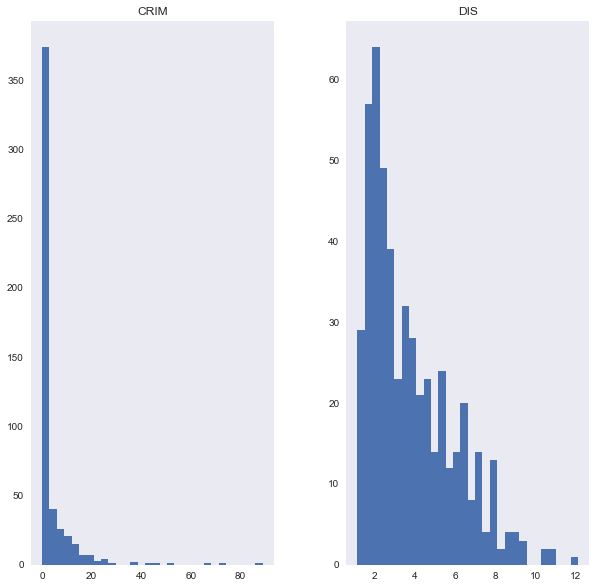

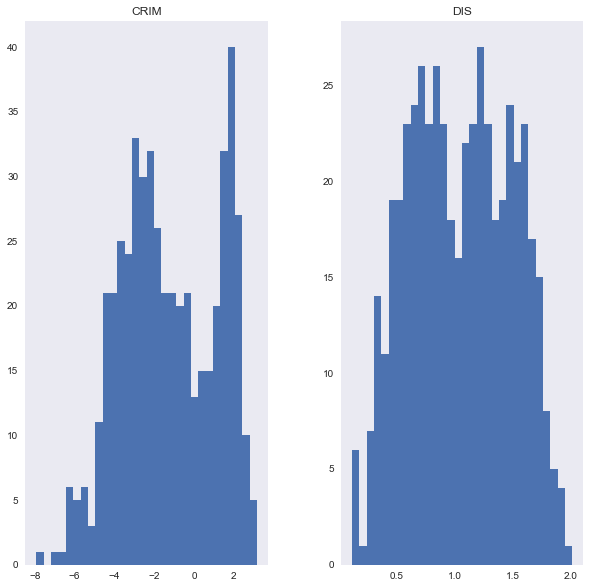

In [55]:
# 위에서 생성한 CRIM_binary는 string 타입이므로 skewness 를 확인 할 수 없으므로 이 변수를 제외함

available_col = []
for idx in feature.columns:
    if feature[idx].dtype != 'object':
        available_col.append(idx)

# Skewness 기준으로 정렬하여 절대값이 1 이상인 변수만 추출
skew_features = feature[available_col].apply(lambda x: sp.stats.skew(x)).sort_values(ascending=False)
high_skewed_features = skew_features[np.abs(skew_features) > 1.0]
print(high_skewed_features)

# Box-Cox 변환
skew_index = high_skewed_features.index
feature[skew_index].hist(bins=30, grid=False, figsize=(10,10), layout=(1,len(skew_index)))
for i in skew_index:
    feature[i] = boxcox(feature[i], boxcox_normmax(feature[i]))   # scipy안에 boxcox있음
feature[skew_index].hist(bins=30, grid=False, figsize=(10,10), layout=(1,len(skew_index)))

# 정규분포로 바꿔서 그래프가 바뀌었다

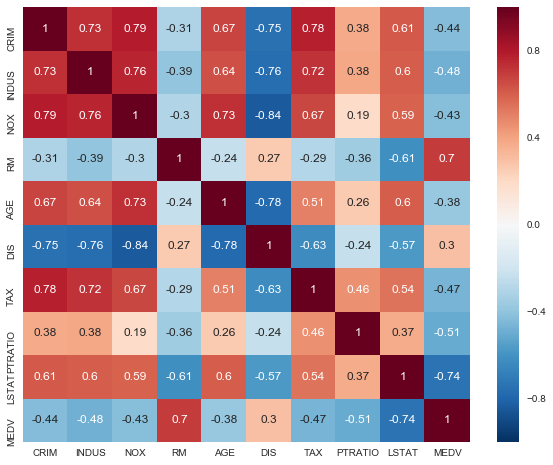

In [57]:
# Transform 된 변수에 대해서 다시 한번 상관성 확인
ax, fig = plt.subplots(figsize=(10,8))
feature['MEDV'] = target
sns.heatmap(feature.corr(), annot=True)
plt.show()
feature = feature.drop(['MEDV'], axis=1)

총 2개의 변수가 선택되어 box-cox 변환을 하였고, 위 아래로 데이터의 분포가 변화했음을 확인 할 수 있다. 변화된 변수를 이용하여 다시 한번 변수별 상관성을 살펴보면 몇몇 변수들의 상관성이 높아졌음을 볼 수 있으며, 예측모델링 시 다중공선성 문제가 발생할 수 있다.

## 2. 예측 모델링

### Training/Test 데이터 분할

최종적으로 선택된 11개의 변수를 이용하여 예측모델링을 진행한다.
우선적으로 Training 데이터와 Test 데이터를 분할한다. 데이터 분할은 8:2로 진행하며, 분할된 Test 데이터는 최종적으로 생성된 모델의 성능을 검증하는데 활용된다.


In [58]:
split_ratio= 0.2
seed = 1
X_train, X_test, Y_train, Y_test = train_test_split(feature, target, test_size=split_ratio, random_state=seed)
print(X_train.shape)
print(X_test.shape)

(404, 9)
(102, 9)


### 평가 척도 정의 

해당 문제의 평가 척도로는 RMSE(Root Mean Square Error) 를 이용한다. 이는 실제 Kaggle 에서 제시하는 평가척도이다.

In [59]:
def cal_rmse(y,y_pred):   #계속쓸거라서 함수로 만듦
    return np.sqrt(mean_squared_error(y, y_pred))

### Cross-validation을 통한 예측모형 성능 비교

우선 크게 Simple regression model과 ensemble model을 나눠서 모델 별 성능을 비교 분석하고, 최종적으로 활용할 모델을 선택한다. 모델 별 성능을 비교하기에 앞서 각 모델 별로 search 과정을 거쳐 최적의 hyper parameter 를 선택한 후, 각 모델이 최적화 된 상태에서 비교 분석을 진행한다. 

### Simple Regression Model

모델링을 진행할 때, Training 데이터에서 k-fold cross-validation 을 이용하여 모델의 평균적인 성능을 확인하며, hyper parameter tuning에도 활용된다. cross-validation에 사용될 fold의 수는 10개로 하며, 총 10번의 서로 다른 데이터에 대한 모델 학습 및 도출된 학습 결과의 평균을 통해 예측모형들의 성능을 비교한다.
첫번째 단계로, 예측 모델을 적용하기 이전에 데이터 표준화를 진행한다. 데이터마다 스케일이 다르기 때문에, 이를 보정하여 예측모델의 성능을 높이고자 한다. 이를 수행하기 위해 sklearn.preprocessing 에서 StandardScaler를 이용한다.
데이터표준화와 모델의 구성을 합치기 위해 파이프라인을 이용하여 구성한다.
모델 성능 평가 지표로는 RMSE를 사용한다.

In [61]:
# Gridsearch를 위해 rmse 를 평가척도로 따로 설정함. 기본적으로 gridsearchcv 는 score를 maximize하는 방향으로 학습되므로, 
# RMSE를 활용하기 위해서는 greater_is_better=False 로 설정한다.
# RMSE로 진행하더라도 내부적으로 score를 음수로 반환하므로 여기에 -를 곱해주어야한다.
# greater_is_better은 클수록좋은 건데(default), 이거를 false함으로써 negative_mean 안써도된다.
scoring_fn = make_scorer(cal_rmse, greater_is_better=False)

본 분석에서는 모델의 hyper parameter tuning을 위해 Randomized Search와 Grid Search를 동시에 고려하는 search를 제시한다. 일반적으로 Grid search 혹은 Randomized search 중 하나를 사용하지만, 어떤 search가 더 좋은 성능을 나타내는지 모르기 때문에 두 가지 search를 모두 활용할 수 있도록 구성한다. 'fit_optimal_model' 라는 custom 함수를 통해 각 모델에서 성능이 높은 hyper parameter를 찾고, 최적의 hyper parameter로 조정된 모델로 pipeline을 구성한 결과를 얻는다.    
랜덤서치는 구간을 정해주면 내부적으로 랜덤으로 숫자를 뽑는 것    
그리드서치의 단점 = 우리가 정해준 값들만 하므로, 그 사이값들은 잘 모름, 그래도 어느정도 optimal로 가므로 주로 사용하긴한다.  
그래서 랜덤서치는 거기에 비해 장점이 있지만, 속도가 느림. 강사님은 차별을 주기위해 둘다 같이씀     
둘다 각각 베스트가 나오면 그 베스트들끼리 비교해서 더 best한 걸 고름

In [63]:
def fit_optimal_model(model,params, x, y, n_folds, seed):
    # 설명 : Randomized search 와 Grid search를 동시에 활용해서 모델의 가장 좋은 parameter를 찾는다.
    # 랜덤서치는 분포를 줘야한다. 
    
    # -----Input 설명-------- 
    # model은 name, pipeline 으로 받는다.
    # param은 model parameter set
    # x : X training set
    # y : Y training set
    # n_folds = k-fold의 n
    # seed : random seed
    # ----------------------- 
    
    # -----return 설명--------
    # best_model : Grid & Randomized search 결과 성능이 가장 좋은 모델을 반환(pipeline으로)
    # best_param : Grid & Randomized search 결과 성능이 가장 좋은 모델의 parameter set을 반환
    # best_search : Grid & Randomized search 결과 성능이 가장 좋은 search 의 결과물을 반환
    
    
    name, regressor = model
    [grid_param, random_param] = params
    # parameter가 굳이 random search가 필요하지 않은 경우(Gridsearch와 동일한 세팅일 때)엔 Grid search만 진행한다.
    if 'None' in list(random_param.keys()):
        do_random_search = False
    else:
        do_random_search = True   

    # Cross valiation을 위한 k=fold를 나눔
    kfold = KFold(n_splits=n_folds, random_state=seed)

    # 위의 설정을 이용해서 Grid search를 fit 한다.
    grid = GridSearchCV(estimator=regressor,param_grid=grid_param, cv=kfold, scoring=scoring_fn)
    grid_search = grid.fit(x, y)
    
    if do_random_search:
        # 위의 설정을 이용해서 Randomized search를 fit 한다.
        randomized_search_iter = 10  # 랜덤하게 몇번를 뽑을 것이냐.  위에랑 차이점은 params_distributions인것.
        random = RandomizedSearchCV(estimator=regressor, param_distributions=random_param, cv=kfold, scoring=scoring_fn, n_iter=randomized_search_iter)
        random_search = random.fit(x,y)
    
    # 두가기 search 결과 비교(RMSE 이므로 낮은 것이 좋음)
    if do_random_search:
        # search 결과 나오는 best_score는 RMSE로 설정했지만 내부적으로 음수로 계산되므로, -를 곱해준다.
        if grid_search.best_score_ * -1 <= random_search.best_score_* -1:  # 그리드, 랜덤서치 값 비교. 더 좋은 것을 가져온다.
            best_param = grid_search.best_params_
            best_pipeline = grid_search.best_estimator_
            best_search = grid_search
        else:
            best_param = random_search.best_params_
            best_pipeline = random_search.best_estimator_
            best_search = random_search
    else:
            best_param = grid_search.best_params_
            best_pipeline = grid_search.best_estimator_
            best_search = grid_search

            
    return best_pipeline, best_param, best_search


우선적으로 먼저 사용할 예측모형들은 Lasso, Ridge, KNN, CART, SVR, LinearRegression 을 이용한다. 앞서 데이터 전처리를 통해 다중공선성 문제의 발생 가능성을 엿봤기 때문에, 이를 제어할 수 있는 예측모형인 Lasso, Ridge 의 결과를 통해 다중공선성 문제가 결정적으로 작용하는지 확인한다. 또한 전통적으로 많이 사용되는 KNN, CART, SVR, LinearRegression 도 비교한다. 
먼저 각 모델 별 hyper parameter 를 세팅한다.
- LinearRegression : 유일한 parameter인 fit_intercept
- LASSO : L2 regularizer의 가중치인 alpha(아주 작은 1e-4 ~ 1보다 큰 10까지 검증)
- RIDGE : L1 regularizer의 가중치인 alpha(아주 작은 1e-4 ~ 1보다 큰 10까지 검증)
- KNN : neighbor의 수 (3~10)
- CART : 트리의 max_depth, split을 하기 위한 최소한의 sample수인 min_samples_split 을 고려
    - max_depth의 경우 데이터 수가 적으므로 매우크지않는 선에서 설정 (6~10)
    - min_samples_split 또한 traning data가 cross-validation 시 400개 정도밖에 되지 않으므로, 작은 수치로 설정 (2~5)
- SVR : kernel 종류 (RBF, poly, sigmoid)

In [67]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from matplotlib import pyplot
import matplotlib.pyplot as plt
# Regression Model 별 파라미터 셋 정리
regression_models = [('LR',Pipeline([('Scaler', StandardScaler()),('LR', LinearRegression())])), 
                     ('LASSO', Pipeline([('Scaler', StandardScaler()),('LASSO', Lasso())])), 
                     ('RIDGE', Pipeline([('Scaler', StandardScaler()),('RIDGE', Ridge())])), 
                     ('KNN', Pipeline([('Scaler', StandardScaler()),('KNN', KNeighborsRegressor())])), 
                     ('CART',Pipeline([('Scaler', StandardScaler()),('CART', DecisionTreeRegressor())])),
                     ('SVR', Pipeline([('Scaler', StandardScaler()),('SVR', SVR())]))]
regression_params = {'LR' : [{"LR__fit_intercept": [True, False]}, {"None": [True, False]}],
                        'LASSO' : [{"LASSO__alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}, {"LASSO__alpha": uniform(1e-4, 10)}], # uniform분포로 데이터 추출
                        'RIDGE' : [{"RIDGE__alpha": [1e-4, 1e-3, 1e-2, 1e-1, 1, 10]}, {"RIDGE__alpha": uniform(1e-4, 10)}],
                        'KNN' : [{'KNN__n_neighbors': [3,4,5,6,7,8,9,10]}, {'KNN__n_neighbors': randint(3, 10)}],
                        'CART' : [{"CART__max_depth": range(6,10,1),"CART__min_samples_split": [2, 3, 4, 5]},
                                 {"CART__max_depth": randint(6,10),"CART__min_samples_split":randint(2, 5)}],
                        'SVR' : [{'SVR__kernel':['rbf', 'poly', 'sigmoid']},{'None':['rbf', 'poly', 'sigmoid']}]}

6개의 모델에서 현재 training data 에서 최적의 hyper parameter를 찾고, 찾은 최적 hyper parameter cross-validation 한 결과를 출력한다. 이를 box-plot을 통해 평균치와 분산을 확인한다.

LR: 4.890306 (0.776251)
{'LR__fit_intercept': True}
LASSO: 4.890269 (0.776639)
{'LASSO__alpha': 0.001}
RIDGE: 4.882625 (0.813376)
{'RIDGE__alpha': 7.457820213069202}
KNN: 3.714158 (0.820246)
{'KNN__n_neighbors': 4}
CART: 3.806854 (0.534768)
{'CART__max_depth': 6, 'CART__min_samples_split': 3}


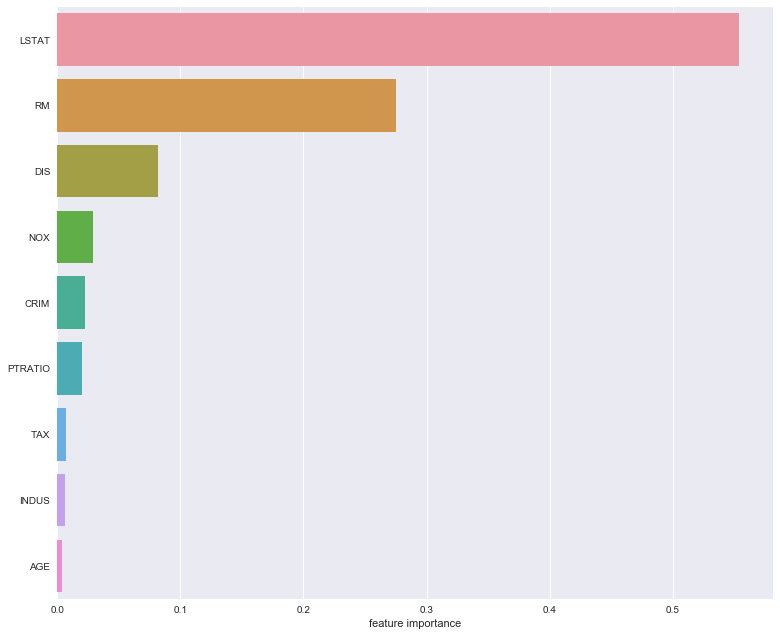

SVR: 4.833319 (1.452639)
{'SVR__kernel': 'rbf'}


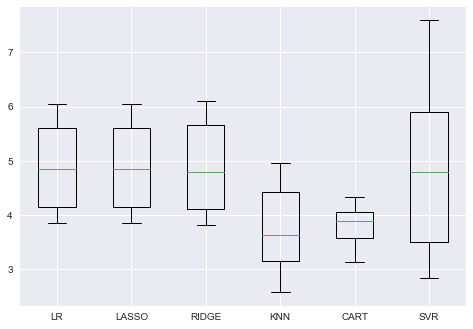

In [68]:
# 각 모델들을 cross-valiation 하여 그 평균적인 RMSE 값을 확인한다.

n_folds = 10
results = []
names = []
for reg_model in regression_models:
    name, model = reg_model
    kfold = KFold(n_splits=n_folds, random_state=seed)
    pipeline,best_param,_ = fit_optimal_model(reg_model, regression_params[name], X_train, Y_train,n_folds, seed)
    cv_results = -cross_val_score(pipeline, X_train, Y_train, cv=kfold, scoring=scoring_fn)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(best_param)
    # 각 모델에서 사용된 변수들의 importance 확인
    if 'CART' in name:
        best_model = pipeline.named_steps[name]
        ranking = np.argsort(-best_model.feature_importances_)
        f, ax = plt.subplots(figsize=(11, 9))
        sns.barplot(x=best_model.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
        ax.set_xlabel("feature importance")
        plt.tight_layout()
        plt.show()
    
#feature importance를 찍음 
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

# rmse분포 CART랑 KNN 제일 성능이 좋게나왓다.
# 아래결과보면, 7.xxxxx 이런거는 random search에서 나온 best이다. 

box-plot의 결과를 살펴보면, LinearRegression과 LASSO, RIDGE 이 거의 비슷한 결과를 나타냄을 알 수 있다. LASSO와 RIDGE 는 각각 L1, L2 Reguralizer를 활용하여 overfitting을 피하고 다중공선성 문제를 완화시킨다고 알려져있다. 이전의 Box-Cox 변환을 통해 변화된 변수들의 상관성을 확인한 결과, 다중공선성 문제의 여지가 있다고 분석했는데 위의 모델 성능을 봤을 땐 크게 문제가 없는 것으로 보인다.
또한 간단한 6개의 모델 결과에서는 KNN과 CART가 가장 좋은 성능을 보임을 알 수 있다. KNN의 경우 n이 3~4에서 좋은 결과를 보이며, CART의 경우에서도 max_depth가 비교적 적은 수치(6 전후)에서 높은 성능을 보였다. 데이터의 수가 적고 단순하기 때문에 굳이 큰 사이즈의 Tree가 필요가 없을것으로 예상된다.
CART 의 경우는 변수 별 중요도를 추출할 수 있다. 이를 통해서 MEDV와 가장 상관성이 높은 LSTAT와 RM이 가장 큰 중요도를 차지하고, DIS, NOX가 다음이었다. CRIM의 경우 EDA에서 분석한 것처럼, 특정 영역에서 중요한 정보를 갖고 있으므로, 예측모델링에 기여했다고 분석 할 수 있다. 


### Ensemble Model

간단한 Regression 모델에 이어서 앙상블 모델을 위와 같이 동일하게 적용하여 모델의 성능들을 비교해본다. 여기서 사용할 앙상블 모델은 RandomForest, AdaBoost, XGboost, LightGBM 을 사용한다. 마찬가지로 각 모델들의 파라미터를 정리한다.
 - 공통 파라미터 : n_estimators 는 공통적으로 100~300으로 제한한다. step은 50으로 설정하고, randomized search에서는 100~300사이의 랜덤값을 이용한다. 또한 Randomforest를 제외하고 learning rate를 사용하는데 이는 1e-4 ~ 1e-1로 설정한다. 일반적으로 좋은 학습 성능을 이루기 위해서는 작은 learning rate를 추천하기 때문에, 작은 수치인 0.1보다 작은 수치로 실험
 
 - RandomForest : 앞서 DecisionTree에서 설정했던 parameter는 동일하게 설정하고, 추가로 bootstrap 옵션을 고려
 
 - Adaboost : loss를 고려
 
 - XGboost : max_depth는 위의 DecisionTree와 동일하게 구성하며, 추가로 min_child_weight, colsample_bytree, gamma를 고려
     - min_child_weight : chlid에서 필요한 모든 관측치에 대한 가중치의 최소 합에 대한 제약으로, 큰 값은 over-fitting을 방지
     - colsample_bytree : 개별 트리를 구성할 때 칼럼들이 랜덤하게 샘플되는 비율을 말하며, 일부 샘플링을 위해 0.8~1.0으로 설정
     - subsample : 개별 트리를 구성할 때 traning data가 랜덤으로 샘플되는 비율을 말하며, 0.8 ~ 1.0 으로 설정

In [70]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
# Regression Model 별 파라미터 셋 정리
ensemble_models = [
                    ('RF', Pipeline([('Scaler', StandardScaler()),('RF', RandomForestRegressor())])),
                   ('AB', Pipeline([('Scaler', StandardScaler()),('AB', AdaBoostRegressor())])),
                   ('XG', Pipeline([('Scaler', StandardScaler()),('XG', XGBRegressor(n_jobs=-1))])),
                    ]

ensenble_params = { 
                    'XG' : [{"XG__n_estimators": range(100,300,50),"XG__max_depth": range(4,7,1),"XG__learning_rate": [1e-4, 1e-3, 1e-2, 1e-1], 'XG__min_child_weight': [1,3,5], 'XG__subsample': [0.8, 0.9, 1.0], 'XG__colsample_bytree': [0.8, 0.9, 1.0]},
                            {"XG__n_estimators": randint(100,300), "XG__max_depth": randint(4,7), "XG__learning_rate": uniform(1e-4, 1e-1), 'XG__min_child_weight': [1,3,5], 'XG__subsample':uniform(0.8 , 0.2),  'XG__colsample_bytree':uniform(0.8, 0.2)}],
                     'AB' : [{"AB__n_estimators": range(100,300,50),"AB__learning_rate": [1e-4, 1e-3, 1e-2, 1e-1],"AB__loss": ['linear','square','exponential']},
                            {"AB__n_estimators": randint(100,300),"AB__learning_rate": uniform(1e-4, 1e-1),"AB__loss": ['linear','square','exponential']}],
                    'RF' : [{"RF__n_estimators": range(100,300,50),"RF__max_depth": range(4,7,1),"RF__min_samples_split": [2,3,4,5],"RF__bootstrap": [True, False]},
                            {"RF__n_estimators": randint(100,300),"RF__max_depth": randint(4,7),"RF__min_samples_split":randint(2, 5),"RF__bootstrap": [True, False]}],
                  }

D:\dev\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RF: 3.218836 (0.494470)
{'RF__bootstrap': True, 'RF__max_depth': 6, 'RF__min_samples_split': 5, 'RF__n_estimators': 150}


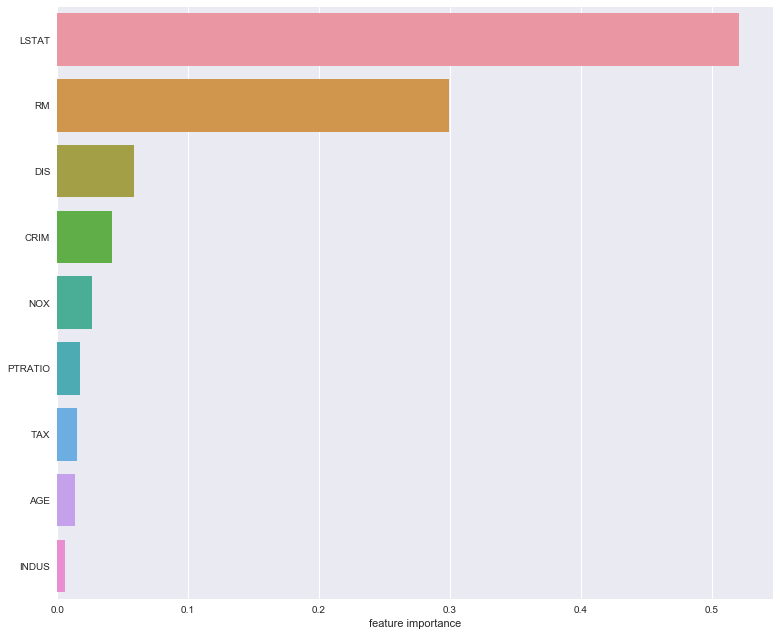

AB: 3.636217 (0.401887)
{'AB__learning_rate': 0.07107924459732384, 'AB__loss': 'exponential', 'AB__n_estimators': 176}


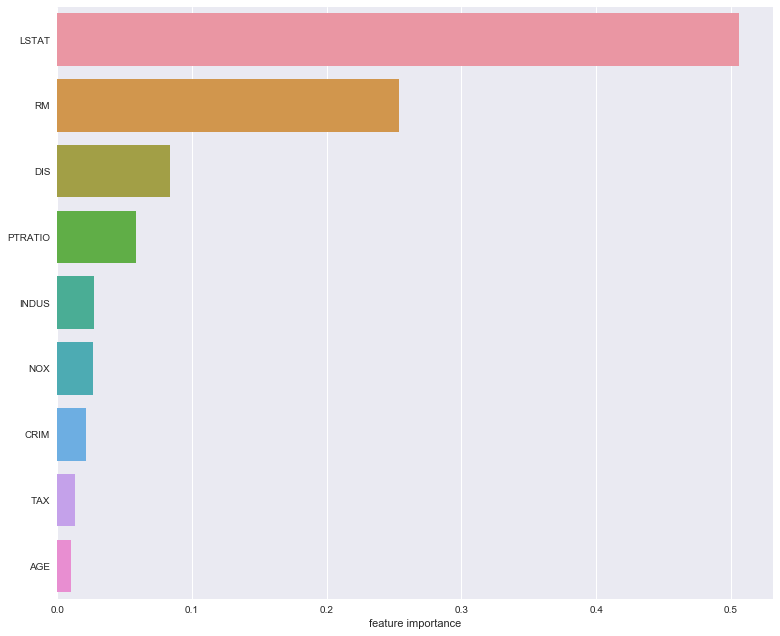

XG: 2.886461 (0.609142)
{'XG__colsample_bytree': 0.871856412380777, 'XG__learning_rate': 0.04478558037123231, 'XG__max_depth': 6, 'XG__min_child_weight': 3, 'XG__n_estimators': 268, 'XG__subsample': 0.9278213464125497}


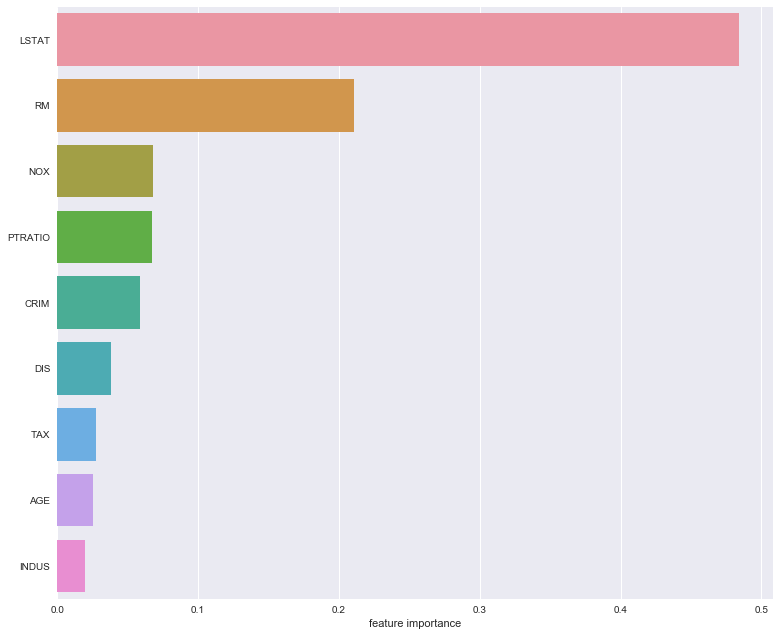

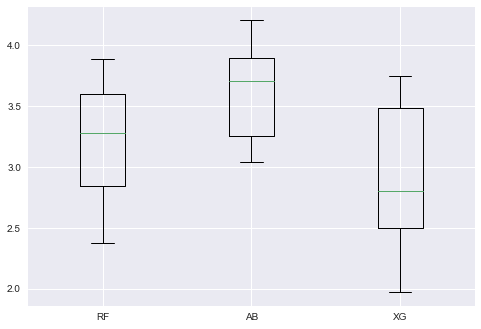

In [71]:
# 각 모델들을 cross-valiation 하여 그 평균적인 RMSE 값을 확인한다.

n_folds = 10
results = []
names = []
for ens_model in ensemble_models:
    name, model = ens_model
    kfold = KFold(n_splits=n_folds, random_state=seed)
    pipeline,best_param,_ = fit_optimal_model(ens_model, ensenble_params[name], X_train, Y_train,n_folds, seed)
    cv_results = -cross_val_score(pipeline, X_train, Y_train, cv=kfold, scoring=scoring_fn)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    print(best_param)
    # 각 모델에서 사용된 변수들의 importance 확인
    best_model = pipeline.named_steps[name]
    ranking = np.argsort(-best_model.feature_importances_)
    f, ax = plt.subplots(figsize=(11, 9))
    sns.barplot(x=best_model.feature_importances_[ranking], y=X_train.columns.values[ranking], orient='h')
    ax.set_xlabel("feature importance")
    plt.tight_layout()
    plt.show()
    
fig = pyplot.figure()
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

앙상블 모델의 경우 위에서 실험한 간단한 regression 모델에 비해 전체적으로 더 높은 성능을 나타낸다. CART가 가장 높은 성능을 나타냈지만 Adaboost가 더 높은 성능을 보인다. 앙상블 모델 중 가장 좋은 성능을 보이는 모델은 XGBoost로 학습시간에서는 상당한 시간이 걸리지만 좋은 성능을 보임을 알 수 있다. 또한 이전의 CART의 결과와 비슷하게 max_depth는 모두 6정도로 깊은 트리는 필요하지 않음을 알 수 있다.

각 앙상블 모델 별로 feature importance를 살펴보면, 종속변수와 상관성이 높은 LSTAT와 RM은 항상 상위에 위치해있음을 알 수 있다. 상대적으로 성능이 좋은 XGboost와 LightGBM의 경우는 상위 5개 변수가 차이가 조금씩 나지만 크게 영향력을 미침을 알 수 있다. XGboost와 LightGBM 이 다른 두 모델과 명확이 차이 나는 변수는 AGE, DIS, CRIM으로 기존의 EDA 분석에서 느꼈던 중요도보다 더 중요한 변수임을 확인할 수 있다. 

XGBoost가 가장 성능이 좋은 것을 판단됨. Best모델! 그냥 모델이랑 앙상블모델 다 합해서..

https://github.com/joongkyunKim/BostonHousing_kaggle   여기에 자료 다 있음. pdf정리된것도 있음!